In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [141]:
df_train = pd.read_csv("/content/drive/MyDrive/ML project/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML project/test.csv")

Reading CSV Files

In [142]:
df_train.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
df_test.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)

Data Visualisation

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

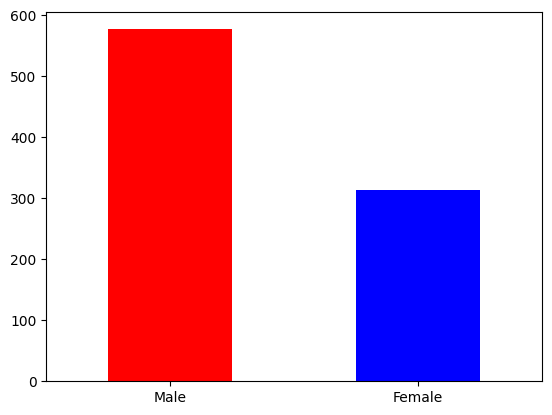

In [143]:
import matplotlib.pyplot as plt
fig = df_train.Sex.value_counts().plot(kind = 'bar', color=["red", 'blue'])  
fig.set_xticklabels(labels=['Male', "Female"], rotation=0)

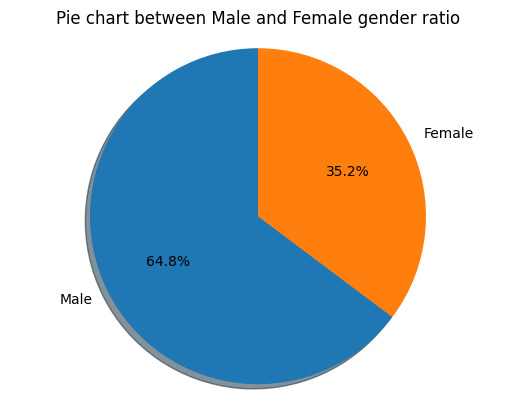

In [144]:
labels = 'Male', 'Female' #labelling
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(df_train.Sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) #pie chart between male and female ratio
ax1.axis('equal')
plt.title('Pie chart between Male and Female gender ratio')
plt.show()

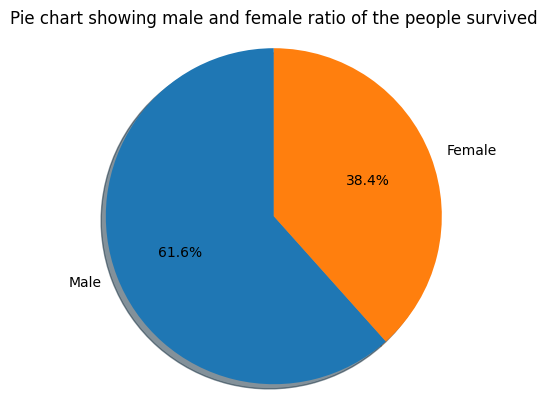

In [145]:
labels = 'Male', 'Female' #labelling
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(df_train.Survived.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) #pie chart between male and female ratio
ax1.axis('equal')
plt.title('Pie chart showing male and female ratio of the people survived')
plt.show()

In [146]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Mapping Categorical variables to numerical values for implementing classification

In [147]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = df_test['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

Checking for missing values in dataset

In [148]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Handling missing values by filling it with 'backfill' and 'ffill' method

In [149]:
df_train['Age'] = df_train['Age'].fillna(method='backfill')
df_train['Embarked'] = df_train['Embarked'].fillna(method='ffill')
df_test['Age'] = df_test['Age'].fillna(method='backfill')
df_test['Embarked'] = df_test['Embarked'].fillna(method='ffill')


**NAIVE** **BAYES**

In [150]:
def likelihood(feature, labels, feature_value, label_value):
    # Calculate the likelihood of the given feature value given the label value
    return np.mean(feature[labels == label_value] == feature_value)

In [151]:
def prior_probability(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    return counts / len(labels)

In [152]:
def likelihood(features, labels, feature_value, label_value):
    num = np.sum((features == feature_value) & (labels == label_value))
    deno = np.sum(labels == label_value)
    return num / deno

In [153]:
def post_probability(features, labels, test_sample):
    n_samples, n_features = features.shape
    n_labels = len(np.unique(labels))
    posterior_probs = np.zeros(n_labels)
    
    for label_value in range(n_labels):
        likelihood_value = 1.0  # Changed variable name to likelihood_value
        for feature_idx in range(n_features):
            feature_value = test_sample[feature_idx]
            likelihood_value *= likelihood(features[:, feature_idx], labels, feature_value, label_value)
        prior_prob = prior_probability(labels)[label_value]
        posterior_probs[label_value] = likelihood_value * prior_prob
    
    return posterior_probs / np.sum(posterior_probs)


In [154]:
def NaiveBayes(x_train, y_train, x_test):
    prediction = []
    for test_sample in x_test:
        posterior_probs = post_probability(x_train, y_train, test_sample)
        predicted_class = np.argmax(posterior_probs)
        prediction.append(predicted_class)
    return prediction

In [155]:
x_train = df_train.drop('Survived', axis=1).values
y_train = df_train['Survived'].values
x_test = df_test.values

In [156]:
predicted = NaiveBayes(x_train, y_train, x_test)

<ipython-input-153-08c0f4768bc3>:14: RuntimeWarning: invalid value encountered in true_divide
  return posterior_probs / np.sum(posterior_probs)


In [157]:
y_pred = NaiveBayes(x_train, y_train, x_train)
accuracy = np.mean(y_pred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 86.76%


**K NEAREST NEIGHBORS**

In [158]:
def euclid_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def kNN(x_train, y_train, x_test, k):
    #x_train=training features
    #y_train=training labels
    #k= no. of neighbors to be considered

    predictions = []
    for test_sample in x_test:
        distances = []

        for train_sample, train_label in zip(x_train, y_train):
            distance = euclid_distance(test_sample, train_sample)
            distances.append((train_sample, train_label, distance))


        distances.sort(key=lambda x: x[2])
        neighbors = distances[:k]

        class_votes = {}

        for neighbor in neighbors:
            label = neighbor[1]
            if label in class_votes:
                class_votes[label] += 1
            else:
                class_votes[label] = 1
    
        predicted_class = max(class_votes, key=class_votes.get)
        predictions.append(predicted_class)

    return predictions

In [159]:
x_train = df_train.drop('Survived', axis=1).values
y_train = df_train['Survived'].values
x_test = df_test.values

In [160]:
k = 6

knn_predictions = kNN(x_train, y_train, x_test, k)

Calculating accuracy score

In [161]:
y_pred = kNN(x_train, y_train, x_train, k)
accuracy = np.mean(y_pred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 86.08%
